**EJERCICIO 1**

    Los ejercicios 1 y 2 se encuentran en el repositorio
Nro: 6 googlenet
----------
Repositorio:https://github.com/R1mber/sis421/tree/master/Examenes/Parcial_1

-----
DatasetBasura:https://drive.google.com/drive/u/0/folders/1uqRTLV8lWfsZ7u1GXe3z90gajNlOry-t


In [ ]:
import os
import torch
import random
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image
from skimage import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cp -av "/content/drive/MyDrive/Dataset_basura" "/content/img"

'/content/drive/MyDrive/Dataset_basura' -> '/content/img'


In [ ]:
path = '/content/img/'
directorios = os.listdir(path)
directorios

['BolsasPlasticas',
 'botellas_de_plastico',
 'cartones',
 'EnvasesPlasticos',
 'papel',
 'Plastoformos',
 'Envaces_Vidrio',
 'BotellasVidrio',
 'metales',
 '.ipynb_checkpoints']

In [ ]:
labels_def = {
              'BolsasPlasticas':1, 
              'botellas_de_plastico':2, 
              'cartones':3, 
              'EnvasesPlasticos':4,
              'metales':5, 
              'papel':6,
              'Plastoformos':7,
              'BotellasVidrio':8,
              'Envaces_Vidrio':0}

In [ ]:
def loadImages(path, directorio):
    labels_ = []
    images_ = []
    for d in directorio:
        imagenes = os.listdir(path + d)
        for i in imagenes:
            imgPath2 = path + d + '/' + i
            images_.append(imgPath2)
            labels_.append(labels_def[d])
    return images_, labels_
def getText(label):
    for key in labels_def:
      if labels_def[key] == label:
        return key

In [ ]:
imgs , labels = loadImages(path,directorios)

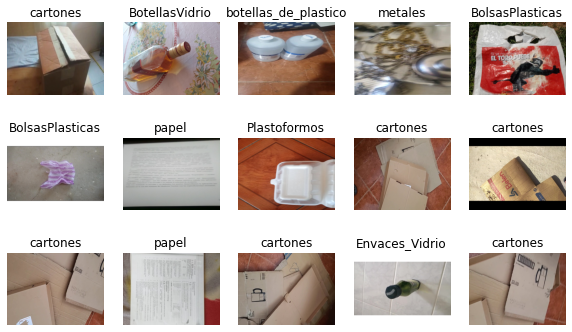

In [ ]:
import random 
from skimage import io
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(getText(labels[ix]))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.05, stratify=labels)

len(train_imgs), len(test_imgs)

(10623, 560)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    # constructor
    def __init__(self, X, Y):
        self.X = X #torch.from_numpy(X).float().cuda()
        self.Y = Y #torch.from_numpy(Y).long().cuda()
    # devolvemos el número de datos en el dataset
    def __len__(self):
        return len(self.X)
    # devolvemos el elemento `ix` del dataset
    def __getitem__(self, ix):
        img1 = Image.open(self.X[ix]).convert('RGB')
        new_img = img1.resize((64,64))
        #normalizamos la imagen 
        npImage = np.array(new_img)
        #return self.X[ix], self.Y[ix]
        #img = self.trans(image=img)["image"]
        return torch.from_numpy(npImage / 255.).float().permute(2,0,1), torch.tensor(self.Y[ix])

In [ ]:
dataset = {
    'train': Dataset(train_imgs, train_labels), 
    'test': Dataset(test_imgs, test_labels)
}
len(dataset['train']), len(dataset['test']),

(10623, 560)

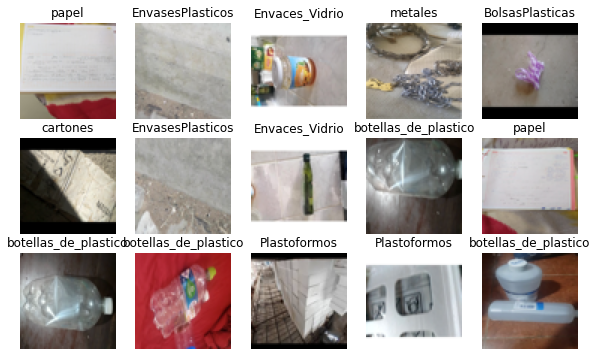

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['test'])-1)
    img, lab = dataset['test'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(getText(lab))
    #ax.set_title(classes[lab])
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=65, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=50, shuffle=False)
}

x_train, y_train = next(iter(dataloader['train']))

In [ ]:
goglenet = torchvision.models.googlenet()
goglenet

/usr/local/lib/python3.7/dist-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
x_train.shape ,x_train[0].shape

(torch.Size([65, 3, 64, 64]), torch.Size([3, 64, 64]))

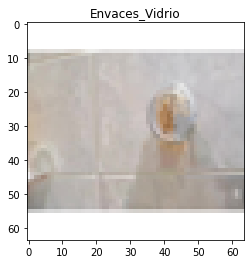

In [ ]:
rand = random.randint(0, len(x_train))
img_perm=x_train[rand].permute(1, 2,0)
plt.imshow(img_perm)
plt.title(getText(y_train[rand]))
plt.show()

In [ ]:
class ModelG(torch.nn.Module):
  def __init__(self, n_outputs=5, pretrained=True, freeze=False):
    super().__init__()
    # descargamos resnet
    google = torchvision.models.googlenet(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.google = torch.nn.Sequential(*list(google.children())[:-1])
    # print(self.google)
    if freeze:
      for param in self.google.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(1024, 9)

  def forward(self, x):
    x = self.google(x)
    # print(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model = ModelG()
outputs = model(torch.randn(64, 3, 64, 64))
outputs.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


torch.Size([64, 9])

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
model = ModelG()
#fit(model, dataloader, epochs=6)

Transfer Learning:
utilizando pesos pre entrenados
---------
el entrenamiento logro un 88.5 % de precisión

In [ ]:
model = ModelG(pretrained=True, freeze=True)
fit(model, dataloader)

  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
val_loss 1.02599 val_acc 0.77833: 100%|██████████| 12/12 [00:37<00:00,  3.09s/it]


Epoch 1/5 loss 1.52230 val_loss 1.02599 acc 0.57387 val_acc 0.77833


val_loss 0.77393 val_acc 0.83167: 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]


Epoch 2/5 loss 0.97410 val_loss 0.77393 acc 0.77005 val_acc 0.83167


val_loss 0.64646 val_acc 0.85000: 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]


Epoch 3/5 loss 0.80121 val_loss 0.64646 acc 0.80182 val_acc 0.85000


val_loss 0.57107 val_acc 0.86833: 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]


Epoch 4/5 loss 0.70799 val_loss 0.57107 acc 0.82183 val_acc 0.86833


val_loss 0.52152 val_acc 0.88500: 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]

Epoch 5/5 loss 0.64648 val_loss 0.52152 acc 0.83747 val_acc 0.88500


*Fine tunning*
---
ademas de utilizar datos pre entrenados 
entrenamos la red completa
----------
los resultado del entrenamiento se logro un 98.5 % de precisión
---
como se puede verificar ver el resultado es mejor que el transfer learning

In [ ]:
model = ModelG(pretrained=True, freeze=False)
fit(model, dataloader)

  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
val_loss 0.35180 val_acc 0.92500: 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]


Epoch 1/5 loss 0.99395 val_loss 0.35180 acc 0.73528 val_acc 0.92500


val_loss 0.15021 val_acc 0.96667: 100%|██████████| 12/12 [00:10<00:00,  1.09it/s]


Epoch 2/5 loss 0.27069 val_loss 0.15021 acc 0.93943 val_acc 0.96667


val_loss 0.09652 val_acc 0.97500: 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]


Epoch 3/5 loss 0.14010 val_loss 0.09652 acc 0.96720 val_acc 0.97500


val_loss 0.07542 val_acc 0.98167: 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]


Epoch 4/5 loss 0.08662 val_loss 0.07542 acc 0.98165 val_acc 0.98167


val_loss 0.06189 val_acc 0.98500: 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

Epoch 5/5 loss 0.05528 val_loss 0.06189 acc 0.98902 val_acc 0.98500


entrenando con un learning rate mas pequeño

In [ ]:
model = ModelG(pretrained=True, freeze=True)
fit(model, dataloader)
model.unfreeze()
fit(model, dataloader, lr=1e-4)

  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
loss 1.82073 acc 0.40457:  39%|███▉      | 64/164 [01:20<02:07,  1.27s/it]